#Importação das bibliotecas

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import tensorflow as tf
import zipfile
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#Carregamento e exploração da base de dados

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/IA/P2/data/eleicao.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./data')
zip_object.close()

In [4]:
candidatos = pd.read_csv('/content/drive/MyDrive/IA/P2/Luana Mendes Alves - consulta_cand_2020_RJ.csv', sep=';', encoding="latin1")
receitas = pd.read_csv('/content/drive/MyDrive/IA/P2/Luana Mendes Alves - receitas_candidatos_2020_RJ.csv', sep=';', encoding="latin1")
despesas = pd.read_csv('/content/drive/MyDrive/IA/P2/Luana Mendes Alves - despesas_contratadas_candidatos_2020_RJ.csv', sep=';', encoding="latin1")

In [5]:
candidatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26541 entries, 0 to 26540
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DT_GERACAO                     26541 non-null  object 
 1   HH_GERACAO                     26541 non-null  object 
 2   ANO_ELEICAO                    26541 non-null  int64  
 3   CD_TIPO_ELEICAO                26541 non-null  int64  
 4   NM_TIPO_ELEICAO                26541 non-null  object 
 5   NR_TURNO                       26541 non-null  int64  
 6   CD_ELEICAO                     26541 non-null  int64  
 7   DS_ELEICAO                     26541 non-null  object 
 8   DT_ELEICAO                     26541 non-null  object 
 9   TP_ABRANGENCIA                 26541 non-null  object 
 10  SG_UF                          26541 non-null  object 
 11  SG_UE                          26541 non-null  int64  
 12  NM_UE                          26541 non-null 

In [6]:
#candidatos.VR_DESPESA_MAX_CAMPANHA = candidatos.VR_DESPESA_MAX_CAMPANHA.astype(np.int64)

In [7]:
candidatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26541 entries, 0 to 26540
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DT_GERACAO                     26541 non-null  object 
 1   HH_GERACAO                     26541 non-null  object 
 2   ANO_ELEICAO                    26541 non-null  int64  
 3   CD_TIPO_ELEICAO                26541 non-null  int64  
 4   NM_TIPO_ELEICAO                26541 non-null  object 
 5   NR_TURNO                       26541 non-null  int64  
 6   CD_ELEICAO                     26541 non-null  int64  
 7   DS_ELEICAO                     26541 non-null  object 
 8   DT_ELEICAO                     26541 non-null  object 
 9   TP_ABRANGENCIA                 26541 non-null  object 
 10  SG_UF                          26541 non-null  object 
 11  SG_UE                          26541 non-null  int64  
 12  NM_UE                          26541 non-null 

In [8]:
receitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111851 entries, 0 to 111850
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   DT_GERACAO                   111851 non-null  object
 1   HH_GERACAO                   111851 non-null  object
 2   ANO_ELEICAO                  111851 non-null  int64 
 3   CD_TIPO_ELEICAO              111851 non-null  int64 
 4   NM_TIPO_ELEICAO              111851 non-null  object
 5   CD_ELEICAO                   111851 non-null  int64 
 6   DS_ELEICAO                   111851 non-null  object
 7   DT_ELEICAO                   111851 non-null  object
 8   ST_TURNO                     111851 non-null  int64 
 9   TP_PRESTACAO_CONTAS          111851 non-null  object
 10  DT_PRESTACAO_CONTAS          111851 non-null  object
 11  SQ_PRESTADOR_CONTAS          111851 non-null  int64 
 12  SG_UF                        111851 non-null  object
 13  SG_UE         

In [9]:
despesas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230112 entries, 0 to 230111
Data columns (total 53 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   DT_GERACAO                 230112 non-null  object
 1   HH_GERACAO                 230112 non-null  object
 2   ANO_ELEICAO                230112 non-null  int64 
 3   CD_TIPO_ELEICAO            230112 non-null  int64 
 4   NM_TIPO_ELEICAO            230112 non-null  object
 5   CD_ELEICAO                 230112 non-null  int64 
 6   DS_ELEICAO                 230112 non-null  object
 7   DT_ELEICAO                 230112 non-null  object
 8   ST_TURNO                   230112 non-null  int64 
 9   TP_PRESTACAO_CONTAS        230112 non-null  object
 10  DT_PRESTACAO_CONTAS        230112 non-null  object
 11  SQ_PRESTADOR_CONTAS        230112 non-null  int64 
 12  SG_UF                      230112 non-null  object
 13  SG_UE                      230112 non-null  

In [10]:
candidatos.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
       'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL',
       'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'SQ_COLIGACAO',
       'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 'CD_NACIONALIDADE',
       'DS_NACIONALIDADE', 'SG_UF_NASCIMENTO', 'CD_MUNICIPIO_NASCIMENTO',
       'NM_MUNICIPIO_NASCIMENTO', 'DT_NASCIMENTO', 'NR_IDADE_DATA_POSSE',
       'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO', 'DS_GENERO',
       'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA', 'CD_OCUPACAO',
       '

In [11]:
candidatos.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
       'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL',
       'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'SQ_COLIGACAO',
       'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 'CD_NACIONALIDADE',
       'DS_NACIONALIDADE', 'SG_UF_NASCIMENTO', 'CD_MUNICIPIO_NASCIMENTO',
       'NM_MUNICIPIO_NASCIMENTO', 'DT_NASCIMENTO', 'NR_IDADE_DATA_POSSE',
       'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO', 'DS_GENERO',
       'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA', 'CD_OCUPACAO',
       '

In [12]:
candidatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26541 entries, 0 to 26540
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DT_GERACAO                     26541 non-null  object 
 1   HH_GERACAO                     26541 non-null  object 
 2   ANO_ELEICAO                    26541 non-null  int64  
 3   CD_TIPO_ELEICAO                26541 non-null  int64  
 4   NM_TIPO_ELEICAO                26541 non-null  object 
 5   NR_TURNO                       26541 non-null  int64  
 6   CD_ELEICAO                     26541 non-null  int64  
 7   DS_ELEICAO                     26541 non-null  object 
 8   DT_ELEICAO                     26541 non-null  object 
 9   TP_ABRANGENCIA                 26541 non-null  object 
 10  SG_UF                          26541 non-null  object 
 11  SG_UE                          26541 non-null  int64  
 12  NM_UE                          26541 non-null 

In [13]:
receitas.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO', 'ST_TURNO',
       'TP_PRESTACAO_CONTAS', 'DT_PRESTACAO_CONTAS', 'SQ_PRESTADOR_CONTAS',
       'SG_UF', 'SG_UE', 'NM_UE', 'NR_CNPJ_PRESTADOR_CONTA', 'CD_CARGO',
       'DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO',
       'NR_CPF_CANDIDATO', 'NR_CPF_VICE_CANDIDATO', 'NR_PARTIDO', 'SG_PARTIDO',
       'NM_PARTIDO', 'CD_FONTE_RECEITA', 'DS_FONTE_RECEITA',
       'CD_ORIGEM_RECEITA', 'DS_ORIGEM_RECEITA', 'CD_NATUREZA_RECEITA',
       'DS_NATUREZA_RECEITA', 'CD_ESPECIE_RECEITA', 'DS_ESPECIE_RECEITA',
       'CD_CNAE_DOADOR', 'DS_CNAE_DOADOR', 'NR_CPF_CNPJ_DOADOR', 'NM_DOADOR',
       'NM_DOADOR_RFB', 'CD_ESFERA_PARTIDARIA_DOADOR',
       'DS_ESFERA_PARTIDARIA_DOADOR', 'SG_UF_DOADOR', 'CD_MUNICIPIO_DOADOR',
       'NM_MUNICIPIO_DOADOR', 'SQ_CANDIDATO_DOADOR', 'NR_CANDIDATO_DOADOR',
       'CD_CARGO_CANDIDATO_DOADOR', 'DS_CARGO_CANDIDATO_DOADOR

In [14]:
despesas.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO', 'ST_TURNO',
       'TP_PRESTACAO_CONTAS', 'DT_PRESTACAO_CONTAS', 'SQ_PRESTADOR_CONTAS',
       'SG_UF', 'SG_UE', 'NM_UE', 'NR_CNPJ_PRESTADOR_CONTA', 'CD_CARGO',
       'DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO',
       'NR_CPF_CANDIDATO', 'NR_CPF_VICE_CANDIDATO', 'NR_PARTIDO', 'SG_PARTIDO',
       'NM_PARTIDO', 'CD_TIPO_FORNECEDOR', 'DS_TIPO_FORNECEDOR',
       'CD_CNAE_FORNECEDOR', 'DS_CNAE_FORNECEDOR', 'NR_CPF_CNPJ_FORNECEDOR',
       'NM_FORNECEDOR', 'NM_FORNECEDOR_RFB', 'CD_ESFERA_PART_FORNECEDOR',
       'DS_ESFERA_PART_FORNECEDOR', 'SG_UF_FORNECEDOR',
       'CD_MUNICIPIO_FORNECEDOR', 'NM_MUNICIPIO_FORNECEDOR',
       'SQ_CANDIDATO_FORNECEDOR', 'NR_CANDIDATO_FORNECEDOR',
       'CD_CARGO_FORNECEDOR', 'DS_CARGO_FORNECEDOR', 'NR_PARTIDO_FORNECEDOR',
       'SG_PARTIDO_FORNECEDOR', 'NM_PARTIDO_FORNECEDOR', 'DS_TIPO_DOCUMENTO',
     

Carregar apenas os dados do Municipio pelo Cargo

In [15]:
cargo = 'VEREADOR'
municipio = 'CAMPOS DOS GOYTACAZES'

Separando os dados para mostrar somente os dados de campos

In [16]:
df_candidato_mun = candidatos.loc[(candidatos['NM_UE'] == municipio) & (candidatos['DS_CARGO'] == cargo)] # Candidatos de Campos
df_candidato_mun

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
1,14/12/2021,11:18:38,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,NÃO ELEITO,N,N,-1,6005532920206190076,2,DEFERIDO,2,DEFERIDO,SIM
124,14/12/2021,11:18:38,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,SUPLENTE,N,S,-1,6004380820206190076,2,DEFERIDO,2,DEFERIDO,SIM
125,14/12/2021,11:18:38,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,SUPLENTE,N,S,-1,6006381520206190076,2,DEFERIDO,2,DEFERIDO,SIM
256,14/12/2021,11:18:38,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,NÃO ELEITO,N,S,-1,6001177020206190076,2,DEFERIDO,2,DEFERIDO,SIM
337,14/12/2021,11:18:38,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,NÃO ELEITO,N,S,-1,6007343020206190076,2,DEFERIDO,2,DEFERIDO,SIM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26430,14/12/2021,11:18:38,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,NÃO ELEITO,N,S,-1,6005671320206190076,14,INDEFERIDO,4,INDEFERIDO COM RECURSO,SIM
26436,14/12/2021,11:18:38,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,SUPLENTE,N,S,-1,6001566720206190076,2,DEFERIDO,2,DEFERIDO,SIM
26463,14/12/2021,11:18:38,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,NÃO ELEITO,N,S,-1,6007265320206190076,2,DEFERIDO,2,DEFERIDO,SIM
26503,14/12/2021,11:18:38,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,SUPLENTE,N,S,-1,6003081820206190076,2,DEFERIDO,2,DEFERIDO,SIM


In [17]:
df_receita_mun = receitas.loc[(receitas['NM_UE'] == municipio) & (receitas['DS_CARGO'] == 'Vereador')] # Receitas de Candidatos de Campos
df_receita_mun

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,ST_TURNO,TP_PRESTACAO_CONTAS,...,DS_CARGO_CANDIDATO_DOADOR,NR_PARTIDO_DOADOR,SG_PARTIDO_DOADOR,NM_PARTIDO_DOADOR,NR_RECIBO_DOACAO,NR_DOCUMENTO_DOACAO,SQ_RECEITA,DT_RECEITA,DS_RECEITA,VR_RECEITA
18,08/12/2021,22:20:30,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,-1,#NULO#,#NULO#,452221358190RJ000001E,618.087.680,20066154,02/10/2020,#NULO#,"1000,00"
19,08/12/2021,22:20:30,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,-1,#NULO#,#NULO#,452221358190RJ000002E,677017917,20066153,15/10/2020,#NULO#,"1000,00"
20,08/12/2021,22:20:30,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,-1,#NULO#,#NULO#,452221358190RJ000003E,36405912,20066152,19/10/2020,#NULO#,"1000,00"
212,08/12/2021,22:20:30,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,-1,#NULO#,#NULO#,157891358190RJ000004E,CAF98FECC34428F9,18650995,15/10/2020,#NULO#,"1000,00"
251,08/12/2021,22:20:30,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,-1,#NULO#,#NULO#,140001358190RJ000076E,#NULO#,18117116,06/11/2020,DOAÇÃO SERVIÇOS DE APOIO,"200,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107449,08/12/2021,22:20:30,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,-1,#NULO#,#NULO#,176801358190RJ000011E,950683,18278789,08/12/2020,#NULO#,"223,40"
110575,08/12/2021,22:20:30,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,-1,#NULO#,#NULO#,123001358190RJ000006E,CAB72343463086,17676810,03/11/2020,#NULO#,"350,00"
110674,08/12/2021,22:20:30,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,-1,#NULO#,#NULO#,700001358190RJ000008E,#NULO#,19062328,23/10/2020,PRODUÇÃO DE JINGLE,"200,00"
110675,08/12/2021,22:20:30,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,-1,#NULO#,#NULO#,122001358190RJ000005E,#NULO#,18085594,27/09/2020,PRODUÇAO DE JINGLE PARA CAMPANHA ELEITORAL,"1000,00"


In [18]:
df_despesa_mun = despesas.loc[(despesas['NM_UE'] == municipio) & (despesas['DS_CARGO'] == 'Vereador')] # Despesas de Canditados de Campos
df_despesa_mun

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,ST_TURNO,TP_PRESTACAO_CONTAS,...,SG_PARTIDO_FORNECEDOR,NM_PARTIDO_FORNECEDOR,DS_TIPO_DOCUMENTO,NR_DOCUMENTO,CD_ORIGEM_DESPESA,DS_ORIGEM_DESPESA,SQ_DESPESA,DT_DESPESA,DS_DESPESA,VR_DESPESA_CONTRATADA
81,08/12/2021,22:16:37,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,#NULO#,Nota Fiscal,1781,20140000,Publicidade por materiais impressos,36285722,04/11/2020,ADESIVOS PERFURADOS 0·60X0·25,"350,00"
82,08/12/2021,22:16:37,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,#NULO#,Nota Fiscal,1781,20140000,Publicidade por materiais impressos,36285722,04/11/2020,ADESIVOS 40X12,"120,00"
83,08/12/2021,22:16:37,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,#NULO#,Nota Fiscal,1781,20140000,Publicidade por materiais impressos,36285722,04/11/2020,ADESIVOS 0·80X0·80,"130,00"
157,08/12/2021,22:16:37,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,#NULO#,Outro,0005,20120000,Serviços prestados por terceiros,34270369,31/10/2020,SERVIÇOS PRESTADOS NA FUNÇÃO DE CABO ELEITORAL,"200,00"
205,08/12/2021,22:16:37,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,#NULO#,Nota Fiscal,56,20140000,Publicidade por materiais impressos,36776380,20/10/2020,SANTINHOS 10X7CM - 4/1 CORES,"1000,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229965,08/12/2021,22:16:37,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,#NULO#,Nota Fiscal,1700,20110000,Publicidade por adesivos,39020954,16/10/2020,BANDEIRAS 1·00X0·70,"300,00"
229966,08/12/2021,22:16:37,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,#NULO#,Nota Fiscal,1700,20110000,Publicidade por adesivos,39020954,16/10/2020,BANNER 1.20X0.60,"20,00"
230076,08/12/2021,22:16:37,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,#NULO#,Nota Fiscal,3129194,20110000,Publicidade por adesivos,37307295,09/11/2020,PANFLETOS,"500,03"
230077,08/12/2021,22:16:37,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,#NULO#,Nota Fiscal,3129194,20110000,Publicidade por adesivos,37307295,09/11/2020,ADESIVOS,"265,20"


**Mostrar o valor total que cada Candidato possui de receita e despesa contratada**

In [19]:
df_receita_mun['VR_RECEITA'] = df_receita_mun['VR_RECEITA'].apply(
    lambda x: float(x.split()[0].replace(',', '.')))
df_despesa_mun['VR_DESPESA_CONTRATADA'] = df_despesa_mun['VR_DESPESA_CONTRATADA'].apply(
    lambda x: float(x.split()[0].replace(',', '.')))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


**Total de receitas por** **candidato**

In [20]:
soma_cand_receita = df_receita_mun[['NR_CPF_CANDIDATO', 'VR_RECEITA']].groupby('NR_CPF_CANDIDATO').sum('VR_RECEITA') # total receita por candidato
soma_cand_receita

,VR_RECEITA
NR_CPF_CANDIDATO,
54102740,655.06
75945770,187.50
105387711,272.00
130014770,11615.38
135459737,6679.70
...,...
99074273734,13811.60
99086654720,5006.85
99383217715,27811.00


**Total de despesas por candidato**

In [21]:
soma_cand_despesa = df_despesa_mun[['NR_CPF_CANDIDATO', 'VR_DESPESA_CONTRATADA']].groupby('NR_CPF_CANDIDATO').sum('VR_DESPESA_CONTRATADA') # total despesa por Candidato
soma_cand_despesa

,VR_DESPESA_CONTRATADA
NR_CPF_CANDIDATO,
130014770,8915.35
135459737,5492.00
196241740,514.00
430964765,600.00
701592702,5500.00
...,...
95167250749,3303.50
95859683715,843.00
98802232768,630.00


In [22]:
despesa_receita = pd.merge(soma_cand_receita, soma_cand_despesa, on=['NR_CPF_CANDIDATO'])
df_candidato_mun = pd.merge(candidatos, despesa_receita, on=['NR_CPF_CANDIDATO'])
df_candidato_mun.head(5)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,VR_RECEITA,VR_DESPESA_CONTRATADA
0,14/12/2021,11:18:38,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,S,-1,6007343020206190076,2,DEFERIDO,2,DEFERIDO,SIM,912.45,540.00
1,14/12/2021,11:18:38,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,S,-1,6000709620206190076,2,DEFERIDO,2,DEFERIDO,SIM,1278.00,20.00
2,14/12/2021,11:18:38,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,S,-1,6001809520206190076,2,DEFERIDO,2,DEFERIDO,SIM,6638.80,1131.95
3,14/12/2021,11:18:38,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,S,-1,6004459720206190076,2,DEFERIDO,2,DEFERIDO,SIM,11639.58,10000.00
4,14/12/2021,11:18:38,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,S,-1,6002545220206190076,2,DEFERIDO,2,DEFERIDO,SIM,2793.67,625.00


**Mantendo somente os valores (Eleito,Não eleito e Suplente)**

In [23]:
df_candidato_mun['DS_SIT_TOT_TURNO'].unique()

array(['NÃO ELEITO', 'SUPLENTE', 'ELEITO POR MÉDIA', '#NULO#',
       'ELEITO POR QP'], dtype=object)

In [24]:
df_candidato_mun['DS_SIT_TOT_TURNO'].loc[df_candidato_mun['DS_SIT_TOT_TURNO'] == 'ELEITO POR QP'] = 'ELEITO'
df_candidato_mun['DS_SIT_TOT_TURNO'].loc[df_candidato_mun['DS_SIT_TOT_TURNO'] == 'ELEITO POR MÉDIA'] = 'ELEITO'
df_candidato_mun['DS_SIT_TOT_TURNO'].unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


array(['NÃO ELEITO', 'SUPLENTE', 'ELEITO', '#NULO#'], dtype=object)

In [25]:
df_candidato_mun['DS_SIT_TOT_TURNO'].loc[df_candidato_mun['DS_SIT_TOT_TURNO'] == '#NULO#'] = 'NÃO ELEITO'
df_candidato_mun['DS_SIT_TOT_TURNO'].unique()

array(['NÃO ELEITO', 'SUPLENTE', 'ELEITO'], dtype=object)

#Análise Exploratória

In [26]:
data = df_candidato_mun
data.head(5)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,VR_RECEITA,VR_DESPESA_CONTRATADA
0,14/12/2021,11:18:38,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,S,-1,6007343020206190076,2,DEFERIDO,2,DEFERIDO,SIM,912.45,540.00
1,14/12/2021,11:18:38,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,S,-1,6000709620206190076,2,DEFERIDO,2,DEFERIDO,SIM,1278.00,20.00
2,14/12/2021,11:18:38,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,S,-1,6001809520206190076,2,DEFERIDO,2,DEFERIDO,SIM,6638.80,1131.95
3,14/12/2021,11:18:38,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,S,-1,6004459720206190076,2,DEFERIDO,2,DEFERIDO,SIM,11639.58,10000.00
4,14/12/2021,11:18:38,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,S,-1,6002545220206190076,2,DEFERIDO,2,DEFERIDO,SIM,2793.67,625.00


In [27]:
data.iloc[-5:, :]

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,VR_RECEITA,VR_DESPESA_CONTRATADA
332,14/12/2021,11:18:38,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,S,-1,6006754220206190076,2,DEFERIDO,2,DEFERIDO,SIM,3094.70,1450.00
333,14/12/2021,11:18:38,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,N,-1,6009075420206190076,2,DEFERIDO,2,DEFERIDO,SIM,196.00,196.00
334,14/12/2021,11:18:38,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,N,-1,6003965620206190076,2,DEFERIDO,2,DEFERIDO,SIM,18718.45,9984.12
335,14/12/2021,11:18:38,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,S,-1,6002588920206190076,2,DEFERIDO,2,DEFERIDO,SIM,29651.42,28740.42
336,14/12/2021,11:18:38,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,S,-1,6003081820206190076,2,DEFERIDO,2,DEFERIDO,SIM,6968.38,3640.00


#Gráficos

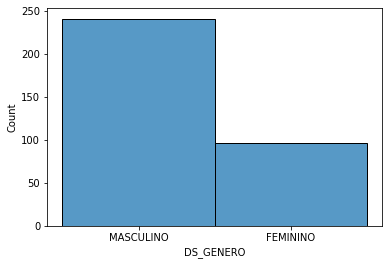

In [28]:
sns.histplot(data=data['DS_GENERO'])

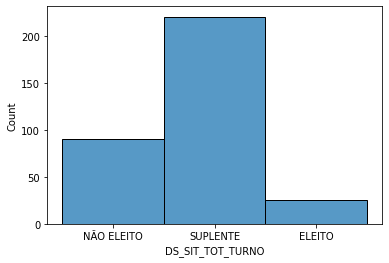

In [29]:
sns.histplot(data=data['DS_SIT_TOT_TURNO'])

**Sexo**

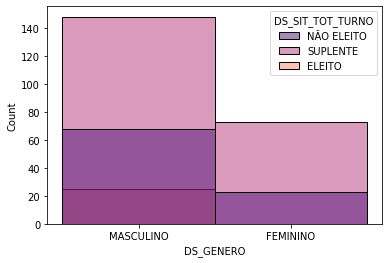

In [30]:
sns.histplot(data=data, x=data['DS_GENERO'], hue='DS_SIT_TOT_TURNO', palette='magma')

***Idade***

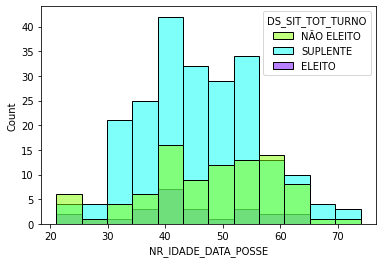

In [31]:
sns.histplot(data=data, x=data['NR_IDADE_DATA_POSSE'], hue='DS_SIT_TOT_TURNO', palette='hsv')

**Despesas**

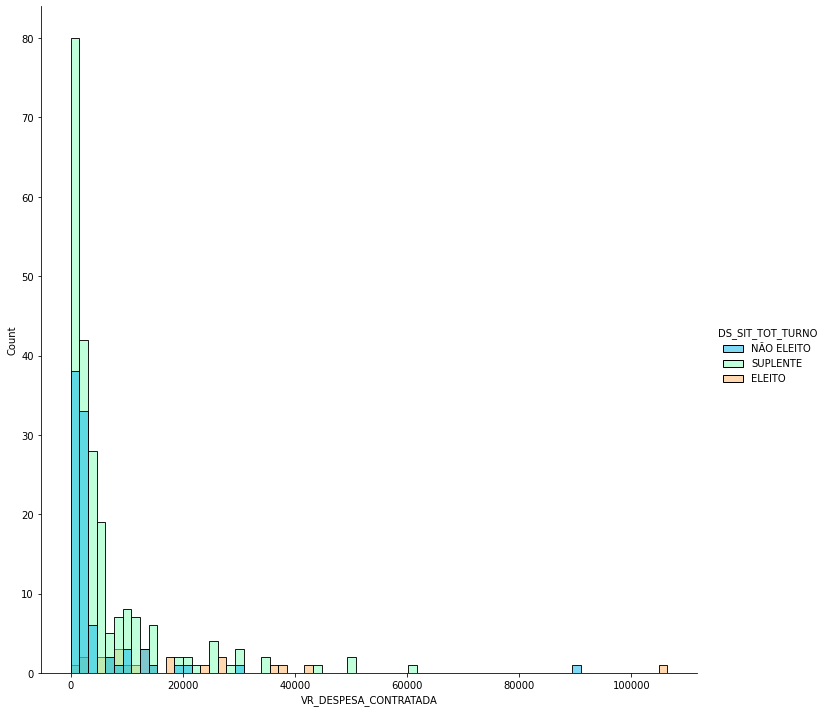

In [32]:
sns.displot(data=data, x=data['VR_DESPESA_CONTRATADA'], hue='DS_SIT_TOT_TURNO', palette='rainbow', height=10)

**Receitas**

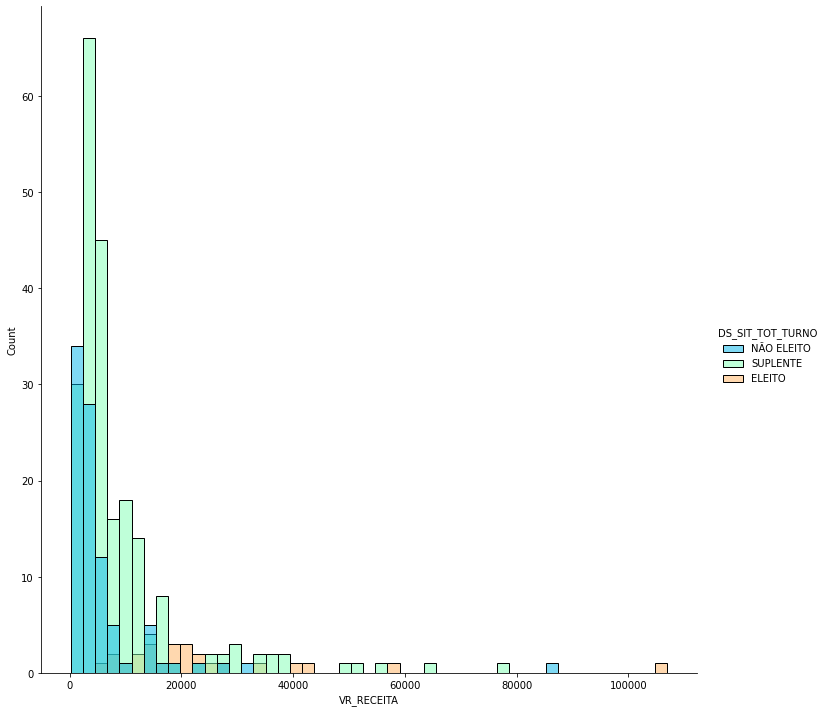

In [33]:
sns.displot(data=data, x=data['VR_RECEITA'], hue='DS_SIT_TOT_TURNO', palette='rainbow', height=10)

**Escolaridade**

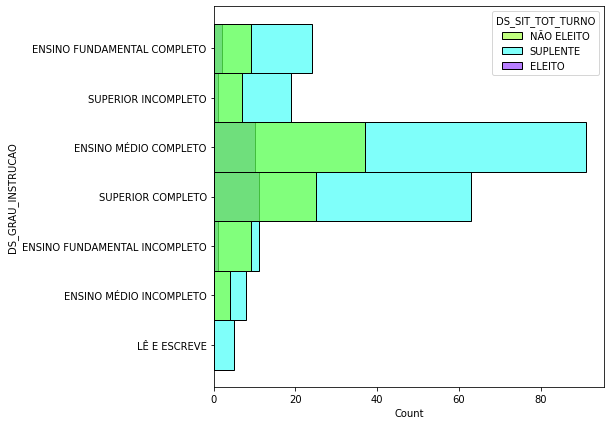

In [34]:
plt.figure(figsize=[7, 7])
sns.histplot(data=data, y=data['DS_GRAU_INSTRUCAO'], hue='DS_SIT_TOT_TURNO', palette='hsv')

**Raça**

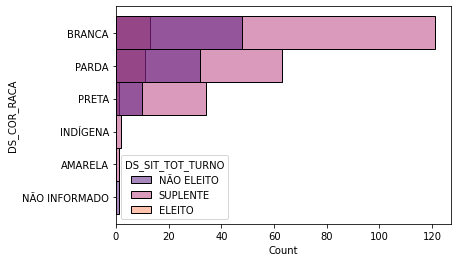

In [35]:
sns.histplot(data=data, y=data['DS_COR_RACA'], hue='DS_SIT_TOT_TURNO', palette='magma')

**Partido**

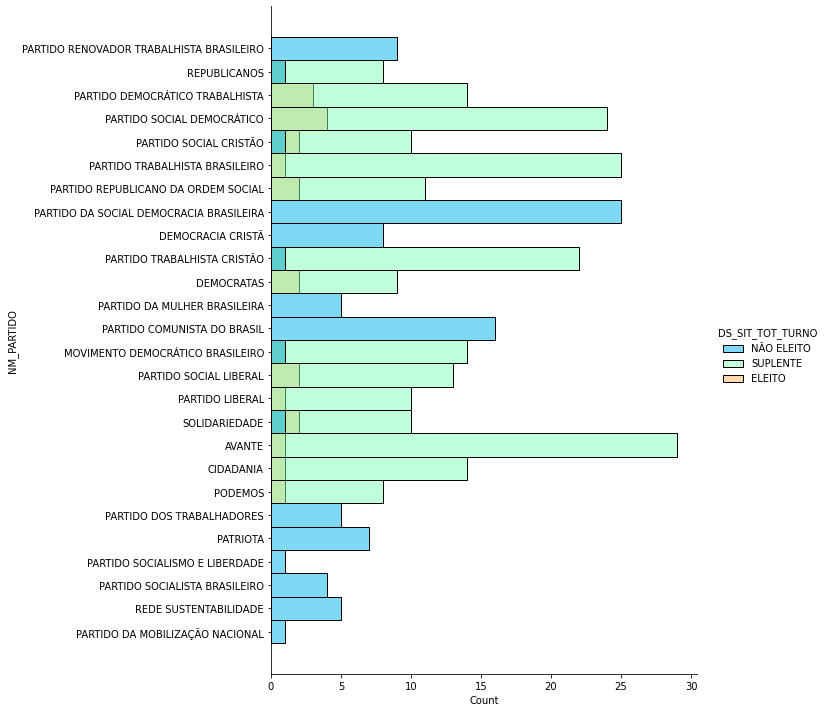

In [36]:
sns.displot(data=data, y=data['NM_PARTIDO'], hue='DS_SIT_TOT_TURNO', palette='rainbow', height=10)

In [37]:
data.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
       'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL',
       'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'SQ_COLIGACAO',
       'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 'CD_NACIONALIDADE',
       'DS_NACIONALIDADE', 'SG_UF_NASCIMENTO', 'CD_MUNICIPIO_NASCIMENTO',
       'NM_MUNICIPIO_NASCIMENTO', 'DT_NASCIMENTO', 'NR_IDADE_DATA_POSSE',
       'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO', 'DS_GENERO',
       'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA', 'CD_OCUPACAO',
       '

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 0 to 336
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DT_GERACAO                     337 non-null    object 
 1   HH_GERACAO                     337 non-null    object 
 2   ANO_ELEICAO                    337 non-null    int64  
 3   CD_TIPO_ELEICAO                337 non-null    int64  
 4   NM_TIPO_ELEICAO                337 non-null    object 
 5   NR_TURNO                       337 non-null    int64  
 6   CD_ELEICAO                     337 non-null    int64  
 7   DS_ELEICAO                     337 non-null    object 
 8   DT_ELEICAO                     337 non-null    object 
 9   TP_ABRANGENCIA                 337 non-null    object 
 10  SG_UF                          337 non-null    object 
 11  SG_UE                          337 non-null    int64  
 12  NM_UE                          337 non-null    obj

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 0 to 336
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DT_GERACAO                     337 non-null    object 
 1   HH_GERACAO                     337 non-null    object 
 2   ANO_ELEICAO                    337 non-null    int64  
 3   CD_TIPO_ELEICAO                337 non-null    int64  
 4   NM_TIPO_ELEICAO                337 non-null    object 
 5   NR_TURNO                       337 non-null    int64  
 6   CD_ELEICAO                     337 non-null    int64  
 7   DS_ELEICAO                     337 non-null    object 
 8   DT_ELEICAO                     337 non-null    object 
 9   TP_ABRANGENCIA                 337 non-null    object 
 10  SG_UF                          337 non-null    object 
 11  SG_UE                          337 non-null    int64  
 12  NM_UE                          337 non-null    obj

In [40]:
data.describe()

,ANO_ELEICAO,CD_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,SG_UE,CD_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NR_CPF_CANDIDATO,CD_SITUACAO_CANDIDATURA,...,CD_COR_RACA,CD_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,VR_RECEITA,VR_DESPESA_CONTRATADA
count,337.0,337.0,337.0,337.0,337.0,337.000000,3.370000e+02,337.000000,3.370000e+02,337.000000,...,337.000000,337.000000,337.000000,337.000000,337.0,3.370000e+02,337.000000,337.000000,337.000000,337.000000
mean,2020.0,2.0,1.0,426.0,58190.0,12.997033,1.900010e+11,37880.937685,2.491488e+10,11.813056,...,1.810089,460.181009,318363.656142,4.513353,-1.0,6.004770e+18,2.053412,2.050445,9185.749852,6439.569377
std,0.0,0.0,0.0,0.0,0.0,0.054473,1.807781e+05,23244.657902,2.993513e+10,1.285476,...,0.966470,338.316754,17394.042255,0.855984,0.0,2.335355e+15,0.773517,0.876516,12526.772433,11373.158236
min,2020.0,2.0,1.0,426.0,58190.0,12.000000,1.900006e+11,45.000000,1.300148e+08,3.000000,...,1.000000,101.000000,-1.000000,-1.000000,-1.0,6.000674e+18,-1.000000,-1.000000,187.500000,9.000000
25%,2020.0,2.0,1.0,426.0,58190.0,13.000000,1.900009e+11,17444.000000,5.428702e+09,12.000000,...,1.000000,213.000000,319311.170000,4.000000,-1.0,6.002909e+18,2.000000,2.000000,2791.580000,995.000000
50%,2020.0,2.0,1.0,426.0,58190.0,13.000000,1.900010e+11,28556.000000,1.018278e+10,12.000000,...,1.000000,266.000000,319311.170000,5.000000,-1.0,6.004866e+18,2.000000,2.000000,5149.700000,2610.000000
75%,2020.0,2.0,1.0,426.0,58190.0,13.000000,1.900011e+11,55333.000000,4.191068e+10,12.000000,...,3.000000,922.000000,319311.170000,5.000000,-1.0,6.006442e+18,2.000000,2.000000,10467.600000,6380.350000
max,2020.0,2.0,1.0,426.0,58190.0,13.000000,1.900013e+11,90999.000000,9.938322e+10,12.000000,...,6.000000,999.000000,319311.170000,5.000000,-1.0,6.009543e+18,14.000000,17.000000,107011.150000,106439.800000


In [41]:
data.head(3)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,VR_RECEITA,VR_DESPESA_CONTRATADA
0,14/12/2021,11:18:38,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,S,-1,6007343020206190076,2,DEFERIDO,2,DEFERIDO,SIM,912.45,540.00
1,14/12/2021,11:18:38,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,S,-1,6000709620206190076,2,DEFERIDO,2,DEFERIDO,SIM,1278.00,20.00
2,14/12/2021,11:18:38,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,S,-1,6001809520206190076,2,DEFERIDO,2,DEFERIDO,SIM,6638.80,1131.95


In [42]:
data.head(3).iloc[:, 9:13]

,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE
0,MUNICIPAL,RJ,58190,CAMPOS DOS GOYTACAZES
1,MUNICIPAL,RJ,58190,CAMPOS DOS GOYTACAZES
2,MUNICIPAL,RJ,58190,CAMPOS DOS GOYTACAZES


In [43]:
np.unique(data['CD_NACIONALIDADE'], return_counts=True)

(array([1, 2]), array([336,   1]))

In [44]:
#data2 = pd.DataFrame()

In [45]:
data = pd.DataFrame(data,columns=['NM_PARTIDO',	'CD_NACIONALIDADE',	'NR_IDADE_DATA_POSSE',	'DS_GENERO',	'DS_GRAU_INSTRUCAO',	'DS_COR_RACA','DS_SIT_TOT_TURNO', 'VR_RECEITA','VR_DESPESA_CONTRATADA'])

**Definir as colunas a serem utilizadas para o valor de X e Y**

In [46]:
#data.drop(columns=columns_to_drop, axis=1, inplace=True)
dataset = data.copy()
data.head(1)

,NM_PARTIDO,CD_NACIONALIDADE,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_COR_RACA,DS_SIT_TOT_TURNO,VR_RECEITA,VR_DESPESA_CONTRATADA
0,PARTIDO RENOVADOR TRABALHISTA BRASILEIRO,1,41,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,BRANCA,NÃO ELEITO,912.45,540.0


**Usar o LabelEncoder para converter palavras para números, assim poderá ser treinado**

In [47]:
label_encoders = LabelEncoder()
dataset.iloc[:, 0] = label_encoders.fit_transform(dataset.iloc[:, 0])

for i in range(3, 9):
    dataset.iloc[:, i] = label_encoders.fit_transform(dataset.iloc[:, i])

In [48]:
dataset.head()

,NM_PARTIDO,CD_NACIONALIDADE,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_COR_RACA,DS_SIT_TOT_TURNO,VR_RECEITA,VR_DESPESA_CONTRATADA
0,12,1,41,1,0,1,1,13,37
1,24,1,39,1,6,4,2,24,2
2,9,1,38,1,6,1,2,180,81
3,15,1,48,1,0,4,2,231,224
4,14,1,40,1,2,5,2,71,47


In [49]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [50]:
dataset[dataset.columns] = scaler.fit_transform(dataset[dataset.columns])

In [51]:
dataset.head(1)

,NM_PARTIDO,CD_NACIONALIDADE,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_COR_RACA,DS_SIT_TOT_TURNO,VR_RECEITA,VR_DESPESA_CONTRATADA
0,0.48,0.0,0.377358,1.0,0.0,0.2,0.5,0.043189,0.132143


**Definindo o X e o Y**

In [52]:
x_data = dataset.drop(columns='DS_SIT_TOT_TURNO', axis=1).values
x_data[0]

array([0.48      , 0.        , 0.37735849, 1.        , 0.        ,
       0.2       , 0.04318937, 0.13214286])

In [53]:
y_data = dataset['DS_SIT_TOT_TURNO'].values
y_data

array([0.5, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0. , 0.5, 0.5, 1. , 1. ,
       1. , 1. , 0.5, 0.5, 0.5, 0.5, 1. , 0. , 1. , 0.5, 1. , 0.5, 1. ,
       1. , 1. , 1. , 1. , 0.5, 1. , 1. , 1. , 0.5, 0.5, 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5, 1. , 1. , 1. , 0. , 1. ,
       0.5, 0.5, 0.5, 0.5, 1. , 1. , 1. , 1. , 1. , 1. , 0.5, 0.5, 1. ,
       1. , 1. , 1. , 1. , 0. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 0.5, 0.5, 1. , 0.5, 1. , 1. , 1. , 0. , 0.5, 1. , 1. ,
       0.5, 0.5, 1. , 1. , 1. , 1. , 0.5, 1. , 0.5, 1. , 1. , 1. , 0.5,
       0. , 1. , 1. , 1. , 1. , 0.5, 1. , 1. , 1. , 0.5, 0.5, 1. , 1. ,
       1. , 1. , 1. , 1. , 0.5, 0.5, 1. , 1. , 1. , 0.5, 1. , 1. , 0.5,
       1. , 0.5, 0.5, 0. , 1. , 1. , 0.5, 0.5, 0.5, 1. , 1. , 0.5, 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 0. , 1. , 1. , 0.5, 1. , 1. , 0. ,
       1. , 1. , 0. , 0.5, 1. , 0.5, 1. , 0.5, 1. , 0. , 1. , 0.5, 1. ,
       0.5, 1. , 1. , 1. , 1. , 1. , 1. , 0.5, 1. , 0.5, 0.5, 1.

In [54]:
x_data.shape, y_data.shape

((337, 8), (337,))

**Arquitetura da Rede Neural Recorrente**

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=0)

**Salvando variáveis de Treino/Teste e Scaler**

In [56]:
with open(file='data/election_train_test_scaler.pkl', mode='wb') as f:
    pickle.dump([x_train, x_test, y_train, y_test, scaler], f)

**Checkpoint**

In [57]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt_{epoch:02d}-{loss:.4f}')
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_prefix, save_weights_only=True)

In [58]:
y_classes = len(np.unique(y_data))
rnn_units = 256

**Construindo o Modelo**

In [59]:
def build_model(x_shape, y_classes, rnn_units):
  print(f'Entrada: {x_shape}')
  model = Sequential()
  model.add(LSTM(rnn_units, input_shape=(x_shape[-1], 1)))
  model.add(Dense(y_classes))
  model.add(Dense(1, activation='softmax'))
  model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

  return model

In [60]:
model = build_model(x_shape=x_data.shape, y_classes=y_classes, rnn_units=rnn_units)

Entrada: (337, 8)


In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (None, 3)                 771       
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 264,967
Trainable params: 264,967
Non-trainable params: 0
_________________________________________________________________


#Arquitetura da Rede Neural Recorrente

In [62]:
x_train.__class__, y_train.__class__, x_train[0].__class__, y_train[0].__class__

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.float64)

In [63]:
x_train.shape, y_train.shape

((235, 8), (235,))

In [64]:
x_test.shape, y_test.shape

((102, 8), (102,))

In [65]:
%%time
model.fit(x_train, y_train, epochs=50, batch_size=1, verbose=2, callbacks=[checkpoint_callback])

Epoch 1/50
235/235 - 4s - loss: 0.1468 - accuracy: 0.6553 - 4s/epoch - 17ms/step
Epoch 2/50
235/235 - 2s - loss: 0.1468 - accuracy: 0.6553 - 2s/epoch - 9ms/step
Epoch 3/50
235/235 - 2s - loss: 0.1468 - accuracy: 0.6553 - 2s/epoch - 9ms/step
Epoch 4/50
235/235 - 2s - loss: 0.1468 - accuracy: 0.6553 - 2s/epoch - 10ms/step
Epoch 5/50
235/235 - 2s - loss: 0.1468 - accuracy: 0.6553 - 2s/epoch - 9ms/step
Epoch 6/50
235/235 - 2s - loss: 0.1468 - accuracy: 0.6553 - 2s/epoch - 9ms/step
Epoch 7/50
235/235 - 2s - loss: 0.1468 - accuracy: 0.6553 - 2s/epoch - 9ms/step
Epoch 8/50
235/235 - 3s - loss: 0.1468 - accuracy: 0.6553 - 3s/epoch - 13ms/step
Epoch 9/50
235/235 - 3s - loss: 0.1468 - accuracy: 0.6553 - 3s/epoch - 11ms/step
Epoch 10/50
235/235 - 2s - loss: 0.1468 - accuracy: 0.6553 - 2s/epoch - 9ms/step
Epoch 11/50
235/235 - 2s - loss: 0.1468 - accuracy: 0.6553 - 2s/epoch - 9ms/step
Epoch 12/50
235/235 - 2s - loss: 0.1468 - accuracy: 0.6553 - 2s/epoch - 9ms/step
Epoch 13/50
235/235 - 2s - loss: 

#Restauração do Checkpoint

In [76]:
tf.train.latest_checkpoint(checkpoint_dir)

'./training_checkpoints/ckpt_50-0.1468'

In [67]:
model = build_model(x_shape=x_data.shape, y_classes=y_classes, rnn_units=rnn_units)
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model.build(tf.TensorShape([1, None]))

Entrada: (337, 8)


In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               264192    
                                                                 
 dense_2 (Dense)             (None, 3)                 771       
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 264,967
Trainable params: 264,967
Non-trainable params: 0
_________________________________________________________________


#Acurácia do modelo

In [69]:
evaluation = model.evaluate(x_test, y_test)

4/4 [==============================] - 1s 10ms/step - loss: 0.1299 - accuracy: 0.6569


In [70]:
evaluation

[0.1299019455909729, 0.656862735748291]

#Previsão de dados

In [71]:
trainPrediction = model.predict(x_train)
testPrediction = model.predict(x_test)
testPrediction

testPrediction_norm = np.argmax(np.array(testPrediction), axis=1)
testPrediction_norm.shape, testPrediction_norm

4/4 [==============================] - 0s 12ms/step


((102,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [72]:
y_test.shape, y_test

((102,),
 array([0.5, 0.5, 0.5, 1. , 0.5, 1. , 0.5, 1. , 0.5, 1. , 1. , 1. , 1. ,
        1. , 1. , 0.5, 1. , 1. , 0. , 1. , 0.5, 1. , 1. , 1. , 0.5, 0.5,
        0.5, 1. , 1. , 0. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5, 1. ,
        0.5, 0.5, 1. , 0.5, 0.5, 0.5, 1. , 1. , 1. , 1. , 0.5, 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5, 0. , 1. , 1. ,
        1. , 1. , 1. , 0.5, 1. , 0.5, 0. , 1. , 1. , 1. , 0.5, 1. , 1. ,
        1. , 0. , 1. , 1. , 0. , 1. , 0.5, 1. , 1. , 1. , 0.5, 1. , 0.5,
        1. , 1. , 1. , 0.5, 0.5, 0.5, 0.5, 1. , 1. , 1. , 1. ]))

In [73]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[1:len(trainPrediction)+1, :] = trainPrediction

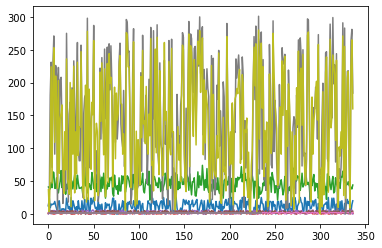

In [74]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)

plt.show()

Conclusão

Durante o processo não houve nenhuma alteração entre os valores de loss e accuracy, isso pode ter sido causado por ter viciado a rede durante seu treinamento.